In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore", category=FutureWarning, message="is_sparse is deprecated")

In [87]:
sewer_data = pd.read_csv('sewer_burst_frequency.csv')

# Set the correct header
sewer_data.columns = sewer_data.iloc[0]
sewer_data = sewer_data[1:]
sewer_data.reset_index(drop=True, inplace=True)

sewer_data.head()

,x,y,z
0,30.92103269,-17.88570024,12
1,31.17458828,-17.72947752,8
2,30.99388325,-17.9370235,3
3,31.06568902,-18.0144793,1
4,31.03406429,-17.86423903,3


## correlation

In [92]:
# Example correlation analysis
correlation_matrix = sewer_data.corr()
print(correlation_matrix)


0         x         y         z
0                              
x  1.000000  0.201658  0.062266
y  0.201658  1.000000  0.128950
z  0.062266  0.128950  1.000000


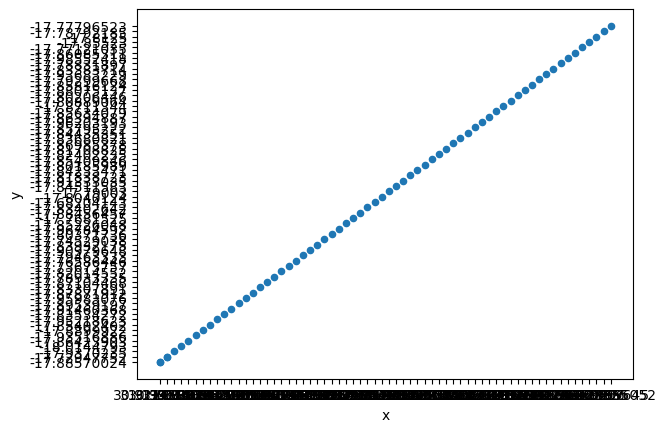

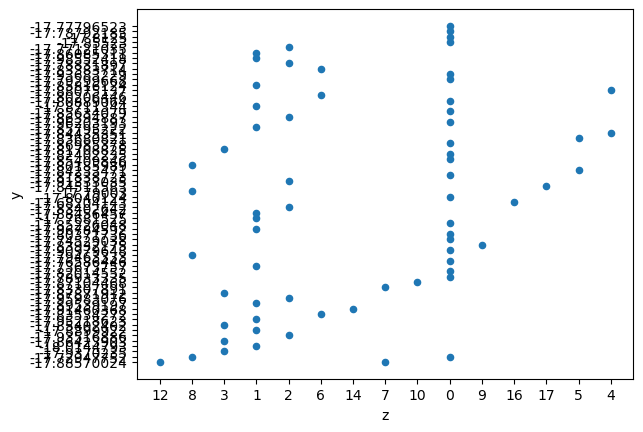

In [98]:
import matplotlib.pyplot as plt

sewer_data.plot(x='x', y='y', kind='scatter')
sewer_data.plot(x='z', y='y', kind='scatter')
plt.show()

## Forcing to regress

In [93]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Assuming 'sewer_data' is your DataFrame containing the sewer data

# Handle missing values (if any)
sewer_data.dropna(inplace=True)

# Select features and target variable
X = sewer_data[['x', 'y']]
y = sewer_data['z']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Build the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_scaled, y)

# Generate meshgrid for x and y
X_surf, Y_surf = np.meshgrid(np.linspace(X_scaled[:, 0].min(), X_scaled[:, 0].max(), 100),
                             np.linspace(X_scaled[:, 1].min(), X_scaled[:, 1].max(), 100))

# Predict 'z' values for the meshgrid points
Z_surf = model.predict(np.array([X_surf.ravel(), Y_surf.ravel()]).T).reshape(X_surf.shape)

# Create the 3D scatter plot
scatter_plot = go.Scatter3d(
    x=X_scaled[:, 0],
    y=X_scaled[:, 1],
    z=y,
    mode='markers',
    marker=dict(color='blue', size=5),
    name='Data points'
)

# Create the surface plot for the regression plane
surface_plot = go.Surface(
    x=X_surf,
    y=Y_surf,
    z=Z_surf,
    colorscale='RdBu',
    opacity=0.5,
    name='Regression Plane'
)

# Create the figure and add the scatter and surface plots
fig = go.Figure(data=[scatter_plot, surface_plot])

# Set axis labels and title
fig.update_layout(scene=dict(xaxis_title='x (scaled)', yaxis_title='y (scaled)', zaxis_title='z'),
                  title='Linear Regression Plane')

# Show the interactive plot
fig.show()


## residual analysis

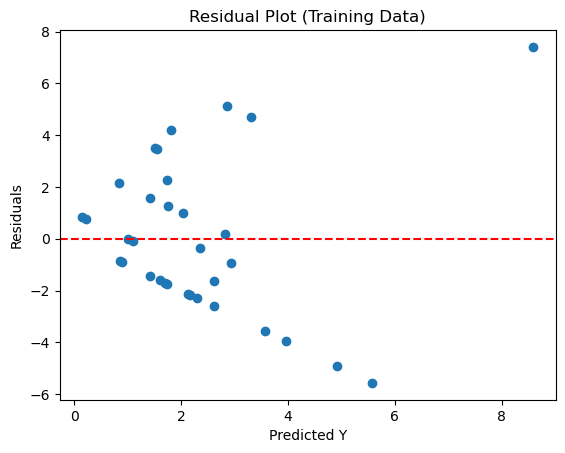

In [96]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Assuming 'X_train' and 'y_train' are your training data

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)

# Train the model
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Predict with the trained model
y_pred_train = model.predict(X_poly_train)
# Convert 'y_train' to numeric
y_train = pd.to_numeric(y_train)

# Calculate residuals
residuals_train = y_train - y_pred_train

# Plot residuals
plt.scatter(y_pred_train, residuals_train)
plt.xlabel('Predicted Y')
plt.ylabel('Residuals')
plt.title('Residual Plot (Training Data)')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()
